In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
df=pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Datasets/main/titanic-training-data.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:

df.shape

(891, 12)

In [ ]:
df=df.drop(['Cabin'],axis=1)

In [ ]:
df.shape

(891, 11)

In [ ]:
median1=df["Age"].median()
median1

28.0

In [ ]:
df["Age"].replace(np.nan,median1,inplace=True)

In [ ]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [ ]:
mode1=df["Embarked"].mode().values[0]

In [ ]:
df["Embarked"].replace(np.nan,mode1,inplace=True)

In [ ]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
duplicate = df.duplicated()
print (duplicate.sum())

0


In [ ]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [ ]:
df.shape

(891, 11)

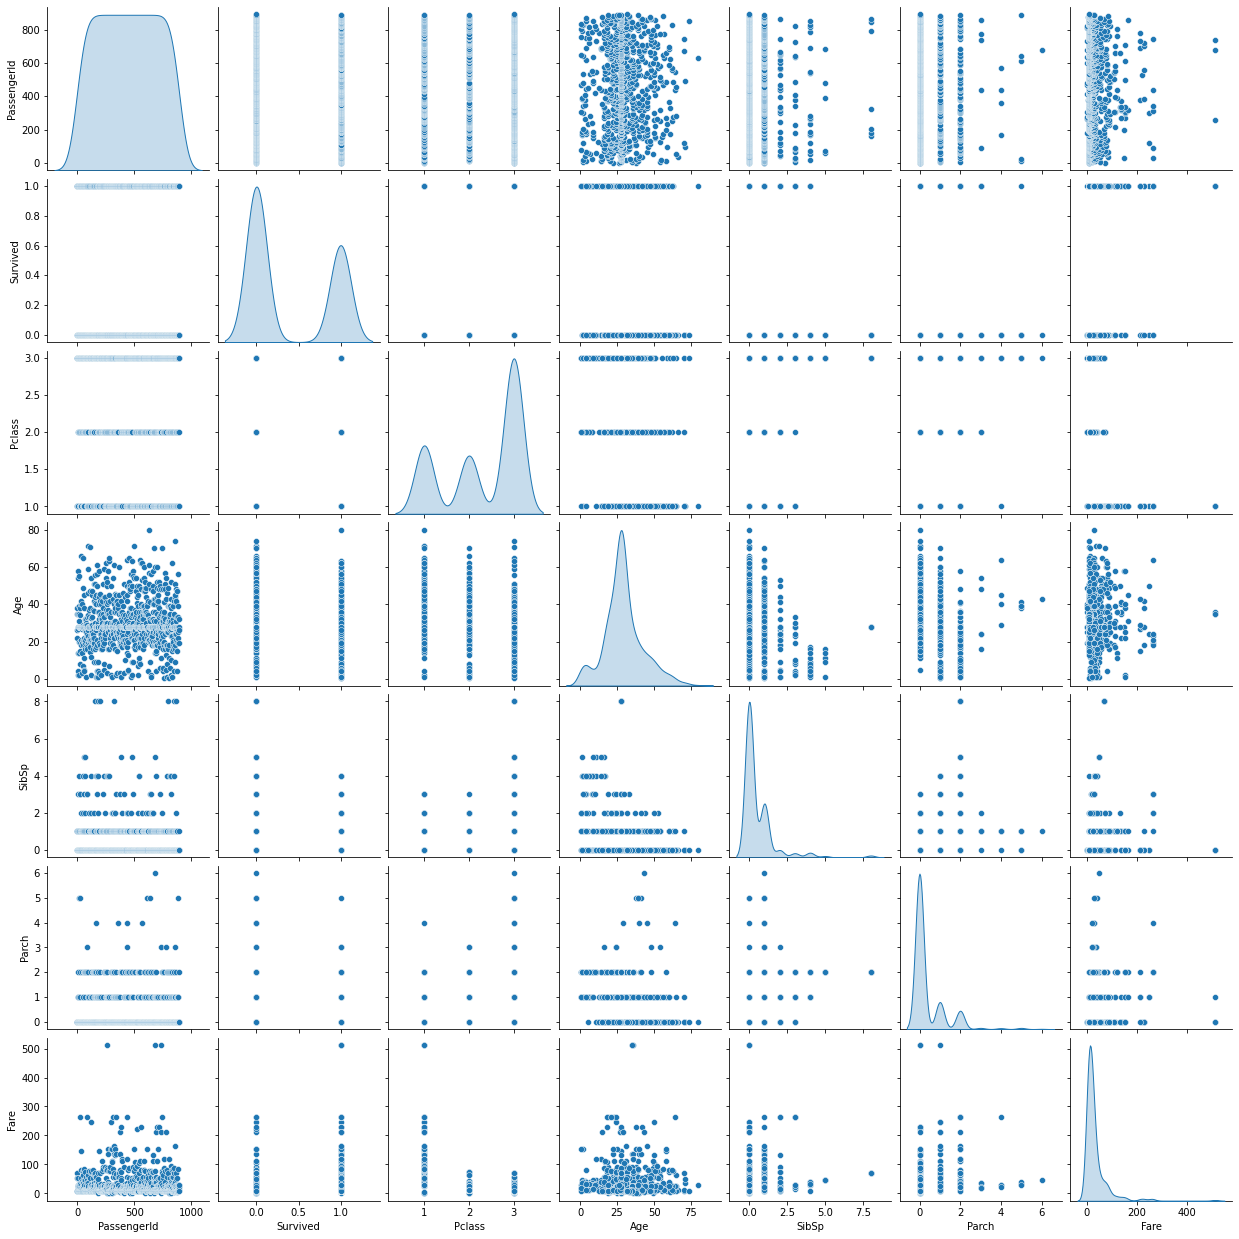

In [ ]:
sns.pairplot(df,diag_kind='kde')

In [ ]:
df=df.drop(["Name"],axis=1)

In [ ]:
df=df.drop(["Ticket"],axis=1)

In [ ]:
df=df.drop(["Fare"],axis=1)

In [ ]:
df=df.drop(["PassengerId"],axis=1)

In [ ]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked'], dtype='object')

In [ ]:
df=pd.get_dummies(df,columns=[ 'Pclass', 'Sex','Embarked'])
df.sample(10)

,Survived,Age,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
288,1,42.0,0,0,0,1,0,0,1,0,0,1
541,0,9.0,4,2,0,0,1,1,0,0,0,1
648,0,28.0,0,0,0,0,1,0,1,0,0,1
56,1,21.0,0,0,0,1,0,1,0,0,0,1
708,1,22.0,0,0,1,0,0,1,0,0,0,1
830,1,15.0,1,0,0,0,1,1,0,1,0,0
605,0,36.0,1,0,0,0,1,0,1,0,0,1
11,1,58.0,0,0,1,0,0,1,0,0,0,1
537,1,30.0,0,0,1,0,0,1,0,1,0,0
467,0,56.0,0,0,1,0,0,0,1,0,0,1


In [ ]:
df.isnull().sum()

Survived      0
Age           0
SibSp         0
Parch         0
Pclass_1      0
Pclass_2      0
Pclass_3      0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [ ]:
df.dtypes

Survived        int64
Age           float64
SibSp           int64
Parch           int64
Pclass_1        uint8
Pclass_2        uint8
Pclass_3        uint8
Sex_female      uint8
Sex_male        uint8
Embarked_C      uint8
Embarked_Q      uint8
Embarked_S      uint8
dtype: object

In [ ]:
X = df.drop(["Survived"], axis=1)
#dependent variable
Y= df["Survived"]

In [ ]:
#Split Xand y into training and test set in ratio 70:30
X_train, X_test, Y_train, Y_test= train_test_split(X, Y ,test_size=0.30, random_state=1)

In [ ]:
model_1 = LogisticRegression()

In [ ]:
df.dtypes

Survived        int64
Age           float64
SibSp           int64
Parch           int64
Pclass_1        uint8
Pclass_2        uint8
Pclass_3        uint8
Sex_female      uint8
Sex_male        uint8
Embarked_C      uint8
Embarked_Q      uint8
Embarked_S      uint8
dtype: object

In [ ]:
model_1.fit(X_train,Y_train)

LogisticRegression()

In [ ]:
model_1.score(X_train, Y_train)

0.8138041733547352

In [ ]:
model_1.score(X_test, Y_test)

0.7761194029850746

In [ ]:
from sklearn.svm import SVR

In [ ]:
model_2=SVR(kernel="linear",gamma="auto",C=1.0)
model_2.fit(X_train,Y_train)

SVR(gamma='auto', kernel='linear')

In [ ]:
df.dtypes

Survived        int64
Age           float64
SibSp           int64
Parch           int64
Pclass_1        uint8
Pclass_2        uint8
Pclass_3        uint8
Sex_female      uint8
Sex_male        uint8
Embarked_C      uint8
Embarked_Q      uint8
Embarked_S      uint8
dtype: object

In [ ]:
model_2.score(X_train,Y_train)

0.26982082669752794

In [ ]:
model_2.score(X_test,Y_test)

0.15535551507943013

In [ ]:
from sklearn.tree import DecisionTreeRegressor
model_3= DecisionTreeRegressor( max_depth=2)

In [ ]:
model_3.fit(X_train,Y_train)

DecisionTreeRegressor(max_depth=2)

In [ ]:
model_3.score(X_train,Y_train)

0.4412908940489676

In [ ]:
model_3.score(X_test,Y_test)

0.269867973091081

In [ ]:
LogisticRegression()

LogisticRegression()

In [ ]:
predictions=model_1.predict(X_test)

In [ ]:
from sklearn import metrics 

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,predictions)

0.7761194029850746

In [ ]:
print(metrics.classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.78      0.86      0.81       153
           1       0.78      0.67      0.72       115

    accuracy                           0.78       268
   macro avg       0.78      0.76      0.77       268
weighted avg       0.78      0.78      0.77       268



In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,predictions)

array([[131,  22],
       [ 38,  77]])

In [ ]:
from sklearn.metrics import classification_report
classification_report(Y_test,predictions)

'              precision    recall  f1-score   support\n\n           0       0.78      0.86      0.81       153\n           1       0.78      0.67      0.72       115\n\n    accuracy                           0.78       268\n   macro avg       0.78      0.76      0.77       268\nweighted avg       0.78      0.78      0.77       268\n'

<AxesSubplot:>

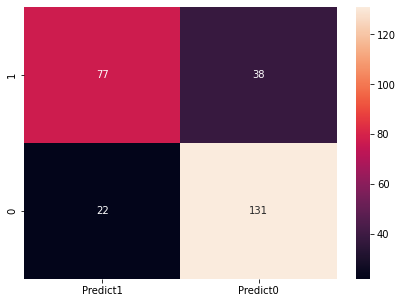

In [ ]:
cm=metrics.confusion_matrix(Y_test,predictions,labels=[1,0])
df_cm=pd.DataFrame(cm,index=[i for i in["1","0"]],columns=[i for i in["Predict1","Predict0"]])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True,fmt='g')